### VAU-12 - Демонстрация работы модели inception автоенкодера 
#### Работу выполнил Вологин Никита Сергеевич

Задача модели, используемой в этом ноутбуке, состоит в определении аномальных значений, которые в контексте предметной области определены как блюда неправильной сервировки. 
В качестве рабочей гипотезы было сформулировано: "Ошибка реконструкции изображений, которые похожи на изображения, находящиеся в обучающем наборе данных, будет меньше, чем у изображений аномальной природы".

Данный ноутбук содержит демонстрационный код работы inception cae, обученных на наборах данных DSM-100 и DSM-50.

##### Импорт необходимых зависимостей

In [90]:
import numpy as np

from tensorflow import keras
from keras import saving as sv

import models.inception_autoencoder as inception_ae

import scripts.utilities as utl

##### Определение глобальных констант

In [117]:
BATCH_SIZE = 64
IMG_SIZE = 128
IMG_100_PATH = 'data/DSM-100/images'
ANO_IMG_100_PATH = 'data/DSM-100/ANO-DSM/uncorrect-meals/images'
ANO_IMG_100_PATH2 = 'data/DSM-100/ANO-DSM/unknown-meals/images'

IMG_50_PATH = 'data/DSM-50/images'
ANO_IMG_50_PATH = 'data/DSM-50/ANO-DSM/uncorrect-meals/images'
ANO_IMG_50_PATH2 = 'data/DSM-50/ANO-DSM/unknown-meals/images'

TEST_IMG_PATH = 'data/test-images/correct'
TEST_ANO_IMG_PATH = 'data/test-images/incorrect'

INC_MODEL_TEST_50_PATH = 'trained-models/inc_model_50_with_test.keras'
INC_MODEL_TEST_100_PATH = 'trained-models/inc_model_100_with_test.keras'

INC_MODEL_50_PATH = 'trained-models/dsm-50/inc_model_50.keras'
INC_MODEL_100_PATH = 'trained-models/dsm-100/inc_model_100.keras'

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
RANDOM_SEED = 42

#### Импорт, предобработка и аугментация данных

In [92]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.5, 1],
    validation_split=0.2)

ano_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_dataget = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [93]:
test_generator = test_dataget.flow_from_directory(
    TEST_IMG_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

test_ano_generator = test_dataget.flow_from_directory(
    TEST_ANO_IMG_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


In [94]:
train_generator_50 = train_datagen.flow_from_directory(
    IMG_50_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

valid_generator_50 = train_datagen.flow_from_directory(
    IMG_50_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='validation',
    seed=RANDOM_SEED
)

unknown_ano_generator_50 = ano_datagen.flow_from_directory(
    ANO_IMG_50_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

uncorrect_ano_generator_50 = ano_datagen.flow_from_directory(
    ANO_IMG_50_PATH2,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

Found 148 images belonging to 45 classes.


Found 7 images belonging to 45 classes.
Found 71 images belonging to 26 classes.
Found 349 images belonging to 55 classes.


In [95]:
train_generator_100 = train_datagen.flow_from_directory(
    IMG_100_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

valid_generator_100 = train_datagen.flow_from_directory(
    IMG_100_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='validation',
    seed=RANDOM_SEED
)

unknown_ano_generator_100 = ano_datagen.flow_from_directory(
    ANO_IMG_100_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

uncorrect_ano_generator_100 = ano_datagen.flow_from_directory(
    ANO_IMG_100_PATH2,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

Found 309 images belonging to 84 classes.
Found 26 images belonging to 84 classes.
Found 156 images belonging to 48 classes.
Found 115 images belonging to 22 classes.


#### Пример изображений блюд

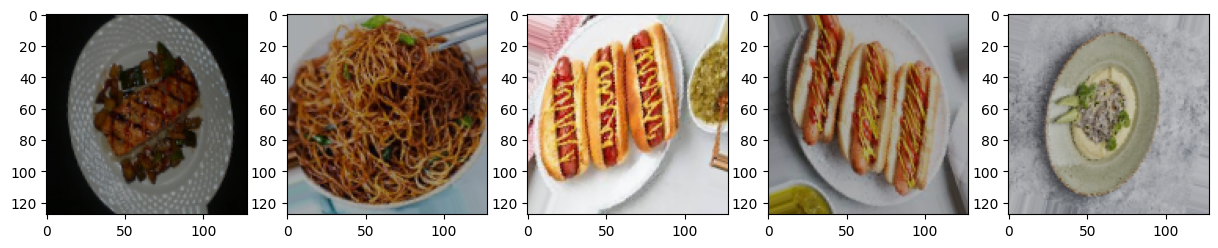

In [96]:
utl.plot_imgs(train_generator_100)

#### Загрузка и инициализация моделей

In [97]:
inc_model_50 = sv.load_model(INC_MODEL_TEST_50_PATH)
inc_model_100 = sv.load_model(INC_MODEL_TEST_100_PATH)

In [98]:
inc_model_100.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mean_squared_error',
)
inc_model_50.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mean_squared_error',
)

#### Примеры реконструкции изображений

Пример реконструкции тестовых данных с помощью модели inception cae, обученной на наборе dsm-100


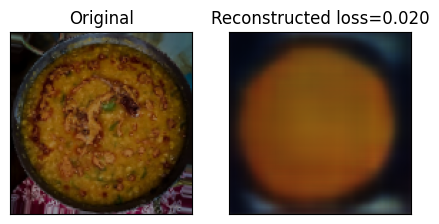

Пример реконструкции тестовых данных с помощью модели inception cae, обученной на наборе dsm-50


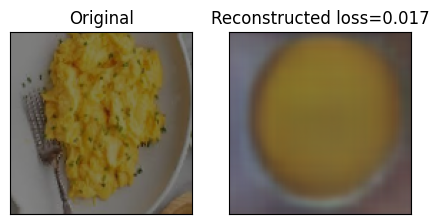

In [99]:
print('Пример реконструкции тестовых данных с помощью модели inception cae, обученной на наборе dsm-100')
utl.plot_rec_imgs(valid_generator_100, 1, inc_model_100)

print('Пример реконструкции тестовых данных с помощью модели inception cae, обученной на наборе dsm-50')
utl.plot_rec_imgs(valid_generator_50, 1, inc_model_50)

Пример реконструкции неизвестных блюд с помощью модели inception cae, обученной на наборе dsm-100


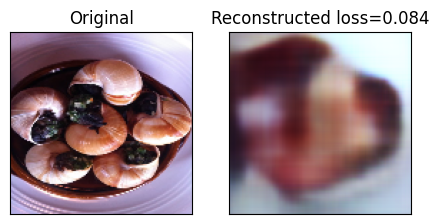

Пример реконструкции неизвестных блюд с модели inception cae, обученной на наборе dsm-50


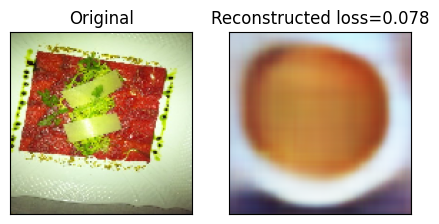

In [100]:
print('Пример реконструкции неизвестных блюд с помощью модели inception cae, обученной на наборе dsm-100')
utl.plot_rec_imgs(unknown_ano_generator_100, 1, inc_model_100)

print('Пример реконструкции неизвестных блюд с модели inception cae, обученной на наборе dsm-50')
utl.plot_rec_imgs(unknown_ano_generator_50, 1, inc_model_50)

Пример реконструкции блюд с неправильной сервировкой с помощью модели inception cae, обученной на наборе dsm-100


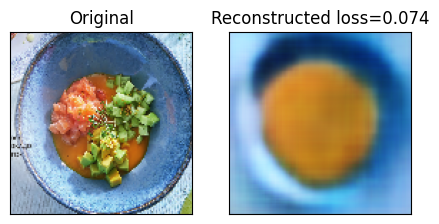

Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-50


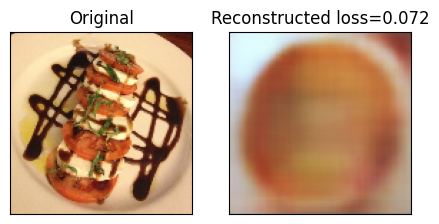

In [101]:
print('Пример реконструкции блюд с неправильной сервировкой с помощью модели inception cae, обученной на наборе dsm-100')
utl.plot_rec_imgs(uncorrect_ano_generator_100, 1, inc_model_100)

print('Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-50')
utl.plot_rec_imgs(uncorrect_ano_generator_50, 1, inc_model_50)

Пример реконструкции блюд с неправильной сервировкой с помощью модели inception cae, обученной на наборе dsm-100


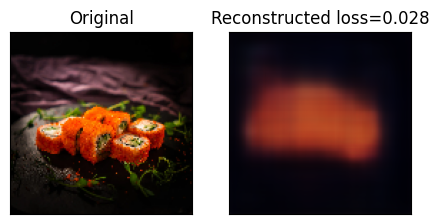

Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-50


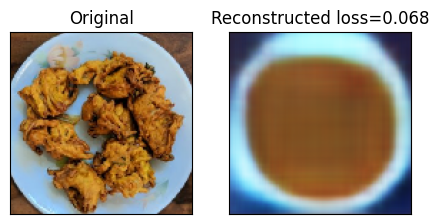

In [102]:
print('Пример реконструкции блюд с неправильной сервировкой с помощью модели inception cae, обученной на наборе dsm-100')
utl.plot_rec_imgs(uncorrect_ano_generator_100, 1, inc_model_100)

print('Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-50')
utl.plot_rec_imgs(uncorrect_ano_generator_50, 1, inc_model_50)

Пример реконструкции тестового блюда с правильной сервировкой с помощью модели inception cae, обученной на наборе dsm-100


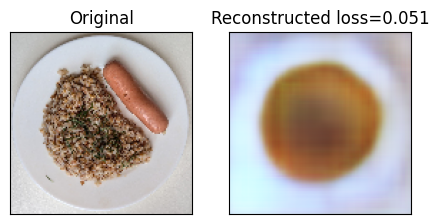

Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-100


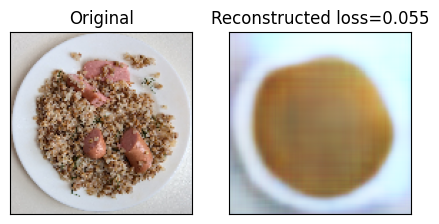

In [118]:
print('Пример реконструкции тестового блюда с правильной сервировкой с помощью модели inception cae, обученной на наборе dsm-100')
utl.plot_rec_imgs(test_generator, 1, inc_model_100)

print('Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-100')
utl.plot_rec_imgs(test_ano_generator, 1, inc_model_100)

Пример реконструкции тестового блюда с правильной сервировкой с помощью модели inception cae, обученной на наборе dsm-50


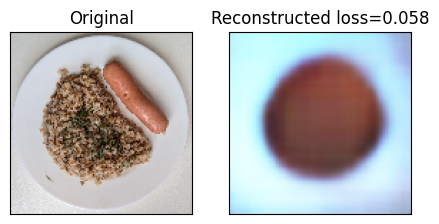

Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-50


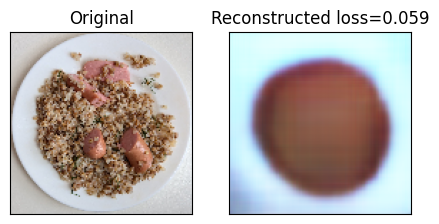

In [121]:
print('Пример реконструкции тестового блюда с правильной сервировкой с помощью модели inception cae, обученной на наборе dsm-50')
utl.plot_rec_imgs(test_generator, 1, inc_model_50)

print('Пример реконструкции блюд с неправильной сервировкой с помощью обычной модели, обученной на наборе dsm-50')
utl.plot_rec_imgs(test_ano_generator, 1, inc_model_50)

#### Вычисление ошибки реконструкции на каждом примере

##### DSM-100

In [105]:
train_recon_error_list = utl.get_error(train_generator_100, inc_model_100, BATCH_SIZE)
test_recon_error_list = utl.get_error(valid_generator_100, inc_model_100, BATCH_SIZE)

uncorrect_ano_recon_error_list = utl.get_error(uncorrect_ano_generator_100, inc_model_100, BATCH_SIZE)
unknown_ano_recon_error_list = utl.get_error(unknown_ano_generator_100, inc_model_100, BATCH_SIZE)

clean = np.append(test_recon_error_list, train_recon_error_list)
fraud = np.append(uncorrect_ano_recon_error_list, unknown_ano_recon_error_list)
threshold = np.mean(clean) + np.std(clean)

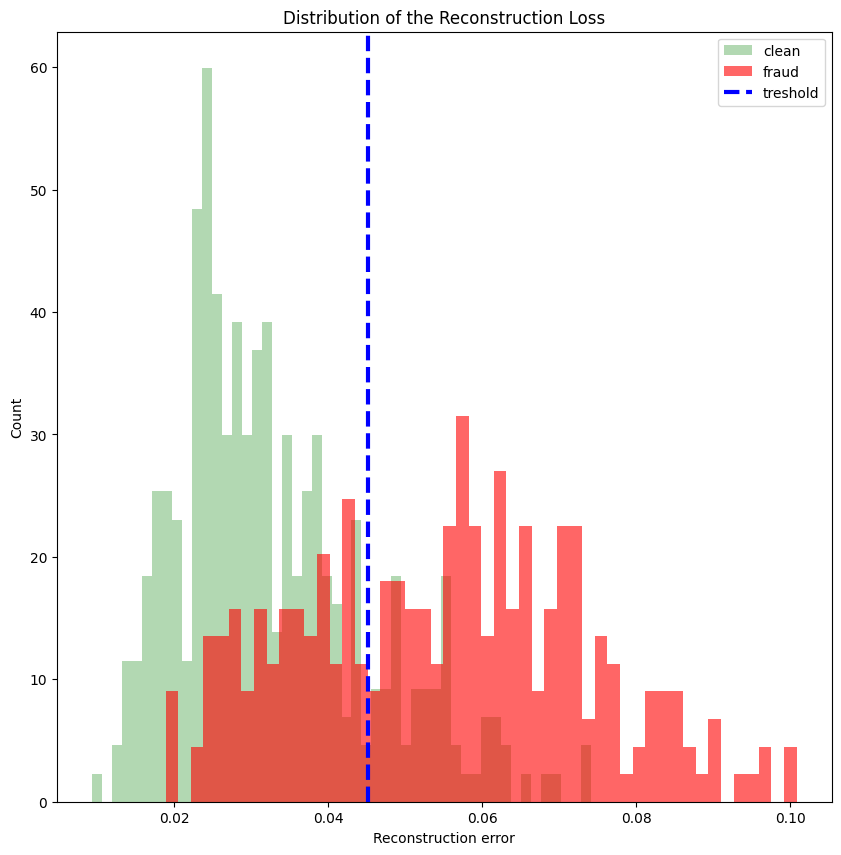

In [106]:
utl.plot_rec_distribution(clean, fraud, threshold)

In [107]:
ano_grechka_recon_error_list = utl.get_error(test_ano_generator, inc_model_100, BATCH_SIZE)
grechka_recon_error_list = utl.get_error(test_generator, inc_model_100, BATCH_SIZE)

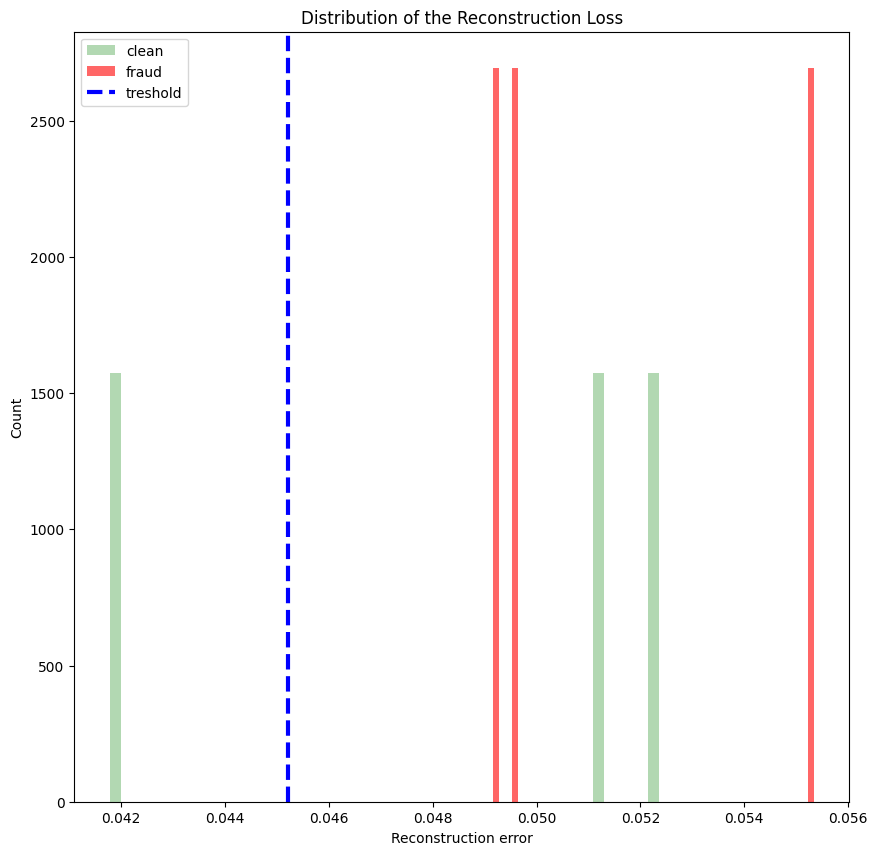

In [108]:
utl.plot_rec_distribution(grechka_recon_error_list, ano_grechka_recon_error_list, threshold)

In [109]:
a, b, c, d = utl.get_classification_metrics(clean, fraud, threshold)
utl.print_classification_metrics(a, b, c, d )

precisicon 0.752
recall 0.833
F 0.790
accuracy: 0.756


In [110]:
a, b, c, d = utl.get_classification_metrics(grechka_recon_error_list, ano_grechka_recon_error_list, threshold)
utl.print_classification_metrics(a, b, c, d )

precisicon 1.000
recall 0.333
F 0.500
accuracy: 0.667


#### Промежуточный вывод

Ошибка реконструкции аномальных примеров и ошибка реконструкции обычных примеров пересекаются, из-за чего отделить друг от друга без ошибки невозможно. Однако можно утверждать, что какое-то определение аномалий с помощью этой модели возможен.

In [111]:
train_recon_error_list = utl.get_error(train_generator_50, inc_model_50, BATCH_SIZE)
test_recon_error_list = utl.get_error(valid_generator_50, inc_model_50, BATCH_SIZE)

uncorrect_ano_recon_error_list = utl.get_error(uncorrect_ano_generator_50, inc_model_50, BATCH_SIZE)
unknown_ano_recon_error_list = utl.get_error(unknown_ano_generator_50, inc_model_50, BATCH_SIZE)

clean = np.append(test_recon_error_list, train_recon_error_list)
fraud = np.append(uncorrect_ano_recon_error_list, unknown_ano_recon_error_list)
threshold = np.mean(clean) + np.std(clean)

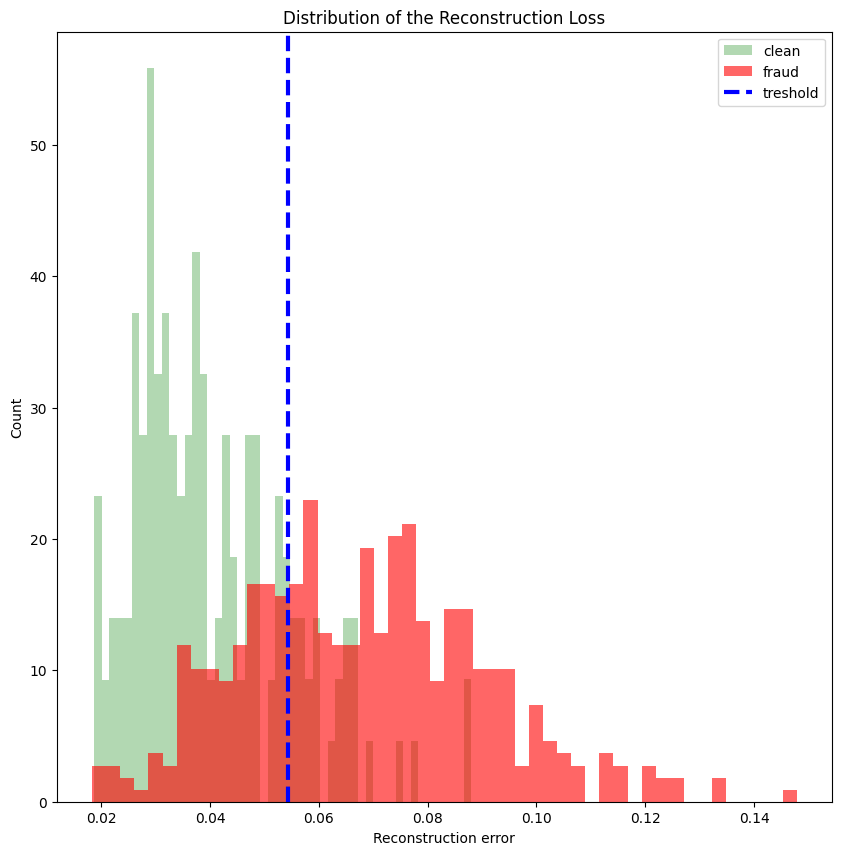

In [112]:
utl.plot_rec_distribution(clean, fraud, threshold)

In [113]:
grechka_recon_error_list = utl.get_error(test_generator, inc_model_50, BATCH_SIZE)
ano_grechka_recon_error_list = utl.get_error(test_ano_generator, inc_model_50, BATCH_SIZE)

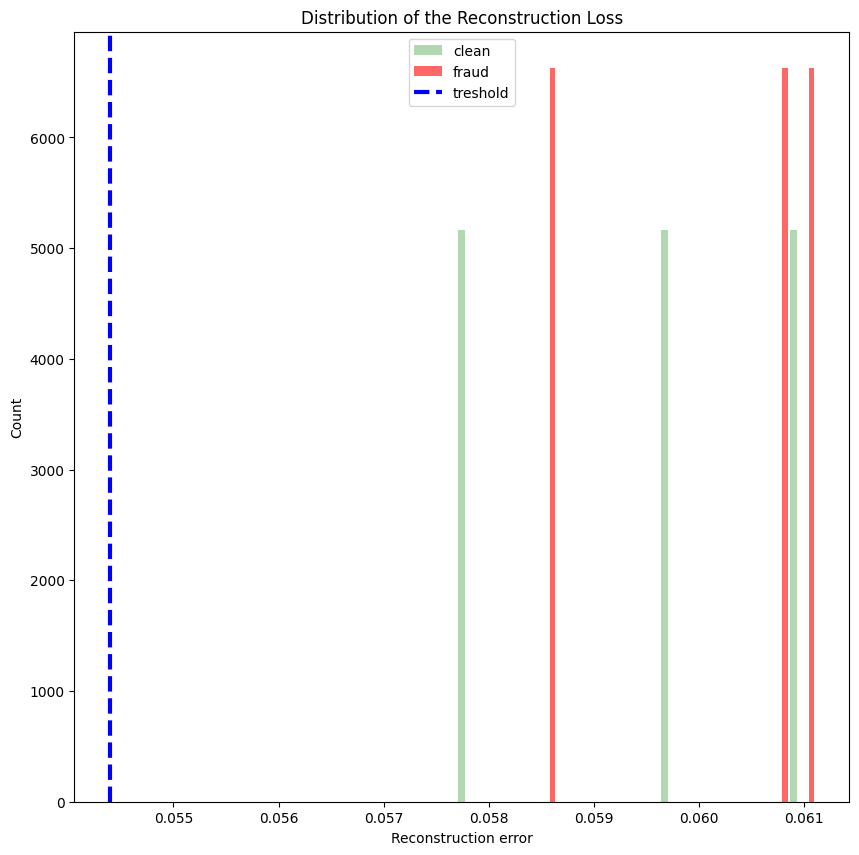

In [114]:
utl.plot_rec_distribution(grechka_recon_error_list, ano_grechka_recon_error_list, threshold)

In [115]:
a, b, c, d = utl.get_classification_metrics(clean, fraud, threshold)
utl.print_classification_metrics(a, b, c, d )

precisicon 0.504
recall 0.826
F 0.626
accuracy: 0.734


In [116]:
a, b, c, d = utl.get_classification_metrics(grechka_recon_error_list, ano_grechka_recon_error_list, threshold)
utl.print_classification_metrics(a, b, c, d )

ZeroDivisionError: division by zero

#### Промежуточный вывод

Разделительная линия, вычисленная на основном наборе данных, вышла не подходящей для разделения тестовых примеров. Но даже не взирая на это, примеры пересекаются, пусть и разделить их можно лучше, чем на наборе данных DSM-100.

#### Выводы

* Точность классификации обеих моделей на основных наборах составляет около ~0.8 
* Точность классификации тестовых примеров находится на неприемлимом уровне.

Как и ожидалось на этапе обучения этой модели, она вышла сильно переобученной, и результаты на тестовых не аномальных примерах имеют высокую ошибку реконструкции, из-за чего установить разницу между нормальными и аномальными данными можно только с плохой точностью.

Возможно стоит пересмотреть архитектуру этой модели, уменьшив количество слоёв или или увеличив размер латентного вектора, чтобы модель могла реконструировать больше информации. Помимо этого, необходимо предпринять меры для того, чтобы модель переобучалась не так сильно. 